In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt

sys.path.append(os.path.join('..'))

from FACT.helper import *
from FACT.fairness import *
from FACT.data_util import *
from FACT.plot import *
from FACT.lin_opt import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


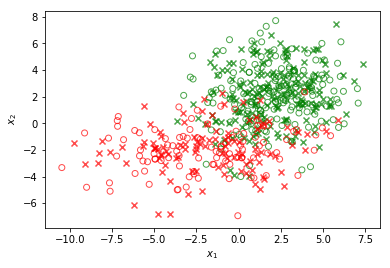

In [3]:
# Fair Data
X_train, y_train, X_test, y_test, X_train_removed, X_test_removed, dtypes, dtypes_, sens_idc, race_idx, sex_idx = get_dataset('synth', corr_sens=False)
plot_synth_data(X_train_removed, y_train, X_train[:,2])

In [15]:
clf = sklearn.linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X_train_removed, y_train)
print(clf.score(X_test_removed, y_test))

0.8666666666666667


In [16]:
fm = FairnessMeasures(X_train, y_train, X_test, y_test, X_train_removed, X_test_removed, clf, 2)
mats, mats_dict, M_const, b_const = get_fairness_mats(fm)
print(mats_dict.keys())
print('TPRs : %f\t%f'%(fm.pos_group_stats['TPR'], fm.neg_group_stats['TPR']))
print('FPRs : %f\t%f'%(fm.pos_group_stats['FPR'], fm.neg_group_stats['FPR']))
print('Base rates: %f\t%f'%(b_const[1] / b_const[0], b_const[3] / b_const[2]))
print(fm.FOR, fm.PPV)

dict_keys(['DemoParity', 'EqOpp', 'NegClassBal', 'ClassBal', 'EqOdd', 'Calibration', 'PosClassBal', 'PredEqual'])
TPRs : 0.917808	0.876712
FPRs : 0.116279	0.235294
Base rates: 0.629310	0.588710
0.16304347826086957 0.8851351351351351


In [17]:
fm.pos_base_rate, fm.neg_base_rate

(0.6293103448275862, 0.5887096774193549)

In [18]:
fm.group_parity_diff(), fm.pos_class_balance()

(0.007786429365962189, (0.8487671232876712, 0.8295890410958904))

In [30]:
fm.equalized_odds_diff()

(0.04109589041095896, 0.11901504787961696)

In [6]:
# Test all possible combinations of fairness measures .. 
result = test_all_enumerations(fm, mats)

['EqOdd', 'Calibration']	False	None
['EqOdd', 'PosClassBal']	True	0.608329433377901
['EqOdd', 'NegClassBal']	True	0.6083307706046828
['EqOdd', 'ClassBal']	True	0.608329511744548
['EqOdd', 'PredEqual']	True	0.6083322038729896
['EqOdd', 'EqOpp']	True	0.6083322452838944
['EqOdd', 'DemoParity']	True	0.6083302873326961
['Calibration', 'PosClassBal']	False	None
['Calibration', 'NegClassBal']	False	None
['Calibration', 'ClassBal']	False	None
['Calibration', 'PredEqual']	False	None
['Calibration', 'EqOpp']	False	None
['Calibration', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal']	True	5.551115123125783e-16
['PosClassBal', 'ClassBal']	True	5.551115123125783e-16
['PosClassBal', 'PredEqual']	True	5.551115123125783e-16
['PosClassBal', 'EqOpp']	True	0.6083298808206725
['PosClassBal', 'DemoParity']	True	0.020970185818037574
['NegClassBal', 'ClassBal']	True	5.551115123125783e-16
['NegClassBal', 'PredEqual']	True	5.551115123125783e-16
['NegClassBal', 'EqOpp']	True	0.6083307706046839
['NegClass

['PosClassBal', 'NegClassBal', 'PredEqual', 'DemoParity']	True	0.3915381819975263
['PosClassBal', 'NegClassBal', 'EqOpp', 'DemoParity']	True	0.6083308433334865
['PosClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.6083313172094077
['PosClassBal', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.39151818843092795
['PosClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	True	0.60833071345082
['PosClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083308433335094
['NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.6083295117535406
['NegClassBal', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.3915931691430231
['NegClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	True	0.6083308433334913
['NegClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083302873326986
['ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083308433335065
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'PredEqual']	False	None
['E

In [6]:
# Get fairness trade-off table from the list of fairness names
some_names = [['PosClassBal', 'ClassBal'], 
              ['PredEqual', 'NegClassBal'],
              ['EqOdd', 'DemoParity'],
              ['EqOdd', 'PosClassBal', 'DemoParity'],
              ['EqOdd', 'ClassBal', 'PredEqual', 'DemoParity'],
              ['EqOdd', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity'],
              ['PosClassBal', 'DemoParity'], 
              ['Calibration', 'ClassBal', 'EqOpp', 'DemoParity'],
              ['PosClassBal', 'NegClassBal', 'Calibration'],
             ]
dd = test_some_names(fm, some_names)
res2text(dd)

['PosClassBal', 'ClassBal']	True	5.551115123125783e-16
['PredEqual', 'NegClassBal']	True	5.551115123125783e-16
['EqOdd', 'DemoParity']	True	0.6083302873326961
['EqOdd', 'PosClassBal', 'DemoParity']	True	0.6083308433335091
['EqOdd', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.6083308433335056
['EqOdd', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.6083310658404862
['PosClassBal', 'DemoParity']	True	0.020970185818037574
['Calibration', 'ClassBal', 'EqOpp', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal', 'Calibration']	False	None


'PCB, CB &  o  & 1.0000\\ PE, NCB &  o  & 1.0000\\ EOd, DP &  o  & 0.3917\\ EOd, PCB, DP &  o  & 0.3917\\ EOd, CB, PE, DP &  o  & 0.3917\\ EOd, CB, PE, EOp, DP &  o  & 0.3917\\ PCB, DP &  o  & 0.9790\\ CG, CB, EOp, DP &  x  & -\\ PCB, NCB, CG &  x  & -\\ '

Calibration,ClassBal,EqOpp,DemoParity	0.021313624718414387
PosClassBal,NegClassBal,Calibration	1.4266210152607383e-05


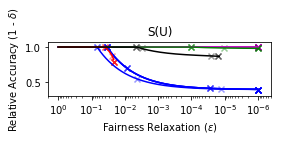

In [7]:
# First get (eps, delta) pairs for optimizing over different lambdas
lmbds_used = get_eps_delta_over_lambdas(mats_dict, M_const, b_const, some_names)

# Plot eps-delta curve
# NOTE manually set up the group for colors
groups = [0, 0, 1, 1, 1, 1, 2, 3, 4]
colors = ['m', 'b', 'g', 'r', 'k']
plot_eps_delta_curves(fm, 
                      some_names, 
                      lmbds_used, 
                      groups=groups, 
                      colors=colors, 
                      data_name='S(U)',
                      save=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbca2962278>,
 <matplotlib.colorbar.Colorbar at 0x7fbca25346a0>)

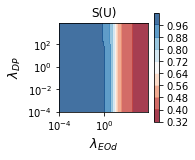

In [9]:
# Multi-dimensional regularization for fairness definitions:   
name = ['EqOdd', 'DemoParity']
plot_accuracy_contours(mats_dict, 
                       name, 
                       M_const, 
                       b_const, 
                       bound=(4,4),
                       data_name='S(U)',
                       save=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a8ea40be0>,
      dtype=object)

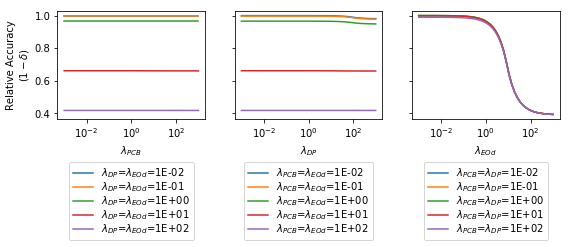

In [37]:
## Orderings
# NOTE place in the order of adding to the rest.
list_name = ['PosClassBal', 'DemoParity', 'EqOdd']
plot_slices(mats_dict, list_name, M_const, b_const, save=True, data_name='SU')